# OpenEars - getting testdata from Sensemakers IoT Platform

## Contents
1. Intro
2. Test setup
3. Getting raw data from Sensemakers IoT Platform
4. Selecting and cleaning data
5. Store the testdata
6. Testresults

## 1. Intro

With this Notebook one can get (test) data from the Sensemakers IoT Platform and load it into a Pandas df. 

As of now, you'll need to start the RPi manually and keep the microphone close to a speaker.
Starting the Pi remotely is not (yet) possible.

#### Flowchart
<img src="drawio_openears-flow.png">

#### Links:
OpenEars GitHub Sensemakers - https://github.com/sensemakersamsterdam/OpenEars
Sensemakers IoT Platform - https://github.com/sensemakersamsterdam/sensemakers-iot-platform

## 2. Test setup

We will use the following video for sounds to test the OpenEars sensor.

### Test procedure.
1. Manually start the Raspberry and keep the microphone close to the loudspeaker.
2. Run the script 'capture_mqtt.py' (in folder devicehive.dev).
3. When the logger displays 'Start recording', start the Youtube video below.
4. Stop the script and the youtube film after 3 minutes, this is for 12 records.
5. Follow the cells below to get the data from the Sensemakers IoT Platform

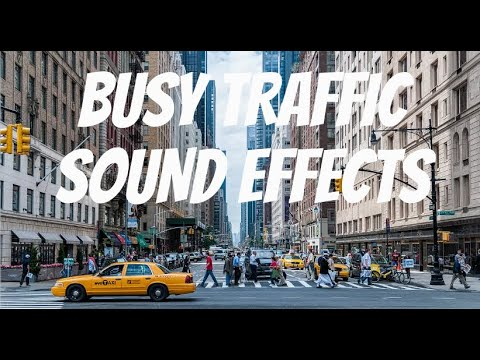

In [3]:
# show the video used in this test
from IPython.lib.display import YouTubeVideo
YouTubeVideo('-rvc63Ez6DM')

## 3. Getting raw data from Sensemakers IoT Platform and write to Pandas Dataframe

### What YOU need to do
- Make sure you have the password for the openears project stored in your environment OR change the variable 'influxdb_password'
- Make sure you have the right dev_id. (bottom of the script, edit it twice)

In [9]:
#source: https://github.com/sensemakersamsterdam/sensemakers-iot-platform/tree/master/scripts
# -*- coding: utf-8 -*-
"""Read data from InfluxDB into Pandas DataFrame."""

from influxdb import DataFrameClient
import os

influxdb_host = "influxdb.sensemakersams.org"
influxdb_port = 443
influxdb_user = "openears"
influxdb_password = os.environ.get('open_ears_pw') # replace if you've not stored the password in the environment. For more info: https://dev.to/biplov/handling-passwords-and-secret-keys-using-environment-variables-2ei0
influxdb_dbname = "iot"

client = DataFrameClient(
    influxdb_host,
    influxdb_port,
    influxdb_user,
    influxdb_password,
    influxdb_dbname,
    ssl=True,
    verify_ssl=True,
)

# Query returns a dictionary of dataframes.
rs = client.query(
    "SELECT * FROM /.*/ WHERE app_id='openears' AND dev_id='TEST001' ", chunked=True, chunk_size=100 #00 #change the dev_id for your own device
)
print(rs.keys())

# Specify the data you want to retrieve.
df = rs["openears/TEST001"] # syntax: app_id/dev_id. 
print(df.tail(12)) #change this parameter to select the last number of records

dict_keys(['openears/TEST001'])
                                  556 gunshots   Brommer  Brommer Alarm  \
2021-05-23 19:53:06.956000+00:00           NaN       NaN       0.999868   
2021-05-23 19:53:21.996000+00:00           NaN  0.609885       0.999786   
2021-05-23 19:53:37.064000+00:00           NaN       NaN       0.999749   
2021-05-23 19:53:52.091000+00:00           NaN       NaN       0.999816   
2021-05-23 19:54:07.122000+00:00           NaN       NaN       0.999644   
2021-05-24 08:22:38.184000+00:00           NaN       NaN       0.150029   
2021-05-24 08:22:52.863000+00:00           NaN       NaN       0.337093   
2021-05-24 08:23:07.990000+00:00           NaN       NaN       0.376981   
2021-05-24 08:23:22.979000+00:00           NaN       NaN       0.288127   
2021-05-24 08:23:38.065000+00:00           NaN       NaN       0.201632   
2021-05-24 08:23:53.113000+00:00           NaN       NaN       0.353635   
2021-05-24 08:24:08.127000+00:00           NaN       NaN       0.462

In [2]:
# show the dataframe
df

,556 gunshots,Brommer,Brommer Alarm,Claxons,Motoren,Terrasgeluide (stille mensen),Versterkte muziek,app_id,dev_id
2021-05-23 19:48:06.175000+00:00,NaN,0.999972,0.999950,NaN,NaN,NaN,NaN,openears,TEST001
2021-05-23 19:48:21.148000+00:00,NaN,NaN,0.980848,0.530702,NaN,NaN,NaN,openears,TEST001
2021-05-23 19:48:36.199000+00:00,NaN,NaN,0.968638,0.494467,NaN,NaN,NaN,openears,TEST001
2021-05-23 19:48:51.193000+00:00,NaN,NaN,0.995855,0.382787,NaN,NaN,NaN,openears,TEST001
2021-05-23 19:49:06.266000+00:00,NaN,0.999970,0.999965,NaN,NaN,NaN,NaN,openears,TEST001
2021-05-23 19:49:21.292000+00:00,NaN,NaN,0.992637,0.260909,0.177878,NaN,NaN,openears,TEST001
2021-05-23 19:49:36.354000+00:00,NaN,NaN,0.992172,0.272163,0.103953,NaN,NaN,openears,TEST001
2021-05-23 19:49:51.404000+00:00,NaN,0.999980,0.999980,NaN,NaN,NaN,NaN,openears,TEST001
2021-05-23 19:50:06.455000+00:00,NaN,NaN,0.999699,NaN,NaN,0.230832,NaN,openears,TEST001
2021-05-23 19:50:21.492000+00:00,NaN,0.989931,0.999295,NaN,NaN,0.291636,NaN,openears,TEST001


## 4. Optional: Drop columns (if influxdb is polluted)

In [3]:
df.columns # show all columns

Index(['556 gunshots', 'Brommer', 'Brommer Alarm', 'Claxons', 'Motoren',
       'Terrasgeluide (stille mensen)', 'Versterkte muziek', 'app_id',
       'dev_id'],
      dtype='object')

In [4]:
#drop non-relevant columns
#df_testdata = df.drop(['app_id', 'cpu temp', 'dev_id','humidity', 'temperature', 'wifi signal'], axis=1) 

In [8]:
df_testdata =df.tail(12) #use only the relevant rows
df_testdata

,556 gunshots,Brommer,Brommer Alarm,Claxons,Motoren,Terrasgeluide (stille mensen),Versterkte muziek,app_id,dev_id
2021-05-23 19:53:06.956000+00:00,NaN,NaN,0.999868,NaN,NaN,0.190303,NaN,openears,TEST001
2021-05-23 19:53:21.996000+00:00,NaN,0.609885,0.999786,NaN,NaN,0.418912,NaN,openears,TEST001
2021-05-23 19:53:37.064000+00:00,NaN,NaN,0.999749,NaN,NaN,0.477327,NaN,openears,TEST001
2021-05-23 19:53:52.091000+00:00,NaN,NaN,0.999816,NaN,NaN,0.247768,NaN,openears,TEST001
2021-05-23 19:54:07.122000+00:00,NaN,NaN,0.999644,0.187817,NaN,NaN,NaN,openears,TEST001
2021-05-24 08:22:38.184000+00:00,NaN,NaN,0.150029,0.962211,NaN,NaN,NaN,openears,TEST001
2021-05-24 08:22:52.863000+00:00,NaN,NaN,0.337093,0.888967,NaN,NaN,NaN,openears,TEST001
2021-05-24 08:23:07.990000+00:00,NaN,NaN,0.376981,0.964587,NaN,NaN,NaN,openears,TEST001
2021-05-24 08:23:22.979000+00:00,NaN,NaN,0.288127,0.943511,NaN,NaN,NaN,openears,TEST001
2021-05-24 08:23:38.065000+00:00,NaN,NaN,0.201632,0.609100,0.625633,NaN,0.2169,openears,TEST001


## 4b. Store the results as a .csv

In [28]:
#CHANGE THE NAME OF THE FILE FORMAT: OEtest_YYMMDD_name.csv
df.to_csv('OEtest_210523_stilte.csv')

## 5. Test results

In [13]:
# !!! Only use this cell when you want to retrieve old test data!!!!
import pandas as pd

df_results=pd.read_csv('OEtest_210523_stilte.csv') #change name to select file
df_results.head()

,Datetime,556 gunshots,Brommer,Brommer Alarm,Claxons,Motoren,Terrasgeluide (stille mensen),app_id,dev_id
0,2021-05-23 19:48:06.175000+00:00,NaN,0.999972,0.999950,NaN,NaN,NaN,openears,TEST001
1,2021-05-23 19:48:21.148000+00:00,NaN,NaN,0.980848,0.530702,NaN,NaN,openears,TEST001
2,2021-05-23 19:48:36.199000+00:00,NaN,NaN,0.968638,0.494467,NaN,NaN,openears,TEST001
3,2021-05-23 19:48:51.193000+00:00,NaN,NaN,0.995855,0.382787,NaN,NaN,openears,TEST001
4,2021-05-23 19:49:06.266000+00:00,NaN,0.999970,0.999965,NaN,NaN,NaN,openears,TEST001


In [14]:
# Prepare for next cell. Drop data columns as next cell can only handle numerical values.
df_results = df_results.drop(['app_id', 'dev_id', 'Datetime'], axis=1) 
df_results

,556 gunshots,Brommer,Brommer Alarm,Claxons,Motoren,Terrasgeluide (stille mensen)
0,NaN,0.999972,0.999950,NaN,NaN,NaN
1,NaN,NaN,0.980848,0.530702,NaN,NaN
2,NaN,NaN,0.968638,0.494467,NaN,NaN
3,NaN,NaN,0.995855,0.382787,NaN,NaN
4,NaN,0.999970,0.999965,NaN,NaN,NaN
5,NaN,NaN,0.992637,0.260909,0.177878,NaN
6,NaN,NaN,0.992172,0.272163,0.103953,NaN
7,NaN,0.999980,0.999980,NaN,NaN,NaN
8,NaN,NaN,0.999699,NaN,NaN,0.230832
9,NaN,0.989931,0.999295,NaN,NaN,0.291636


In [16]:
# create a new df with only Class with highest prediction 
import pandas as pd
result_df = pd.DataFrame(columns = ['Class' , 'Prediction'])
result_df['Class'] = df_results.idxmax(axis=1) # get the name of the column
result_df['Prediction'] = df_results.max(axis=1) # get the highest value per row
result_df #show the results

,Class,Prediction
0,Brommer,0.999972
1,Brommer Alarm,0.980848
2,Brommer Alarm,0.968638
3,Brommer Alarm,0.995855
4,Brommer,0.999970
5,Brommer Alarm,0.992637
6,Brommer Alarm,0.992172
7,Brommer,0.999980
8,Brommer Alarm,0.999699
9,Brommer Alarm,0.999295
